In [39]:
import numpy as np
import matplotlib.pyplot as plt
# import arcpy
import mujoco
import mediapy as media
import time

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [40]:
filename = "robot.xml"
with open(filename, 'r') as f:
  xml = f.read()

In [41]:
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

""

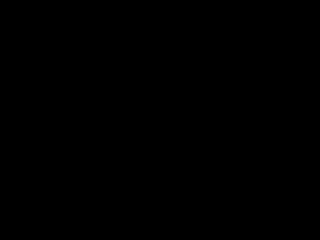

In [42]:
mujoco.mj_forward(model, data)
renderer.update_scene(data)
media.show_image(renderer.render())

In [43]:
DURATION  = 2   # seconds
FRAMERATE = 60  # Hz
mujoco.mj_resetDataKeyframe(model, data, 1)

In [44]:
frames = []
i = 0

# print(data.timestep)
# get time in microseconds
start = time.time()

while data.time < DURATION:
    # Step the simulation.
    mujoco.mj_step(model, data)
    # print(str(i) +": "+ str(data.time), end='\r')
    #time.sleep(0.1)
    # i = i +1
    # break
    # Render and save frames.
    if len(frames) < data.time * FRAMERATE:
        renderer.update_scene(data)
        pixels = renderer.render()
        frames.append(pixels)

end = time.time()
print("time: " + str(end - start))

time: 0.06716656684875488


In [45]:
media.show_video(frames, fps=FRAMERATE)

In [37]:
len(frames)

121

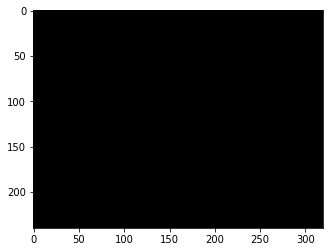

In [38]:
plt.imshow(frames[1])